In [1]:
import os

path = "../datasets/IstanbulSaleFlatData/"
files = os.listdir(path)  # Auflistet alle Folien im Verzeichnis
print(files)

['22_5_2022_sahibinden_ev.csv', '26_5_2022_sahibinden_ev.csv', '5_9_2022_sahibinden_ev.csv']


- Wie lädt man die Dateien

In [3]:
import pandas as pd 

df_original = pd.DataFrame()
for file in files:
    filepath = os.path.join(path, file)
    df_original = pd.concat([df_original, pd.read_csv(filepath)], ignore_index=True)

- Wie kann man die ersten Zeilen der Daten anzeigen?

In [4]:
df_original.head()

,Unnamed: 0,title,area,numberOfRooms,price,town,district
0,0,"KINALIADA İSKELEYE , ÇARŞIYA COK YAKİN MERKEZİ...",110.0,2+1,3.450.000,KınalıadaKınalıada Mh,.
1,1,Sahibinden bakımlı iskeleye 5 dk yürüme mesafe...,85.0,2+1,4.050.000,BüyükadaNizam Mh,.
2,2,Katta Tek orta kat,130.0,2+1,3.500.000,KınalıadaKınalıada Mh,.
3,3,Planet'ten İskeleye 5 Dkka İçi Sıfır Geniş 1+1...,75.0,1+1,2.100.000,NaN,NaN
4,4,KINALIADA AKASYA CADDESİNDE KOMPLE SATILIK BİN...,900.0,4+2,19.500.000,KınalıadaKınalıada Mh,.


- Wie bekommt man einen schnellen Überblick über die Daten?

In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44840 entries, 0 to 44839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     44840 non-null  int64  
 1   title          44840 non-null  object 
 2   area           44840 non-null  float64
 3   numberOfRooms  44840 non-null  object 
 4   price          44840 non-null  object 
 5   town           43465 non-null  object 
 6   district       40923 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.4+ MB


- Wie kann man alle möglichen Werte einer Spalte anzeigen?

In [6]:
df_original['numberOfRooms'].unique()

array(['2+1', '1+1', '4+2', '3+1', '4+1', '3+2', '5+1', '5+2', '2.5+1',
       '7+3', '6+2', '2+2', '3.5+1', '6+3', '4+4', '4+0', '7+2', '4+3',
       '8+2', '6+1', 'Stüdyo', '1.5+1', '10+2', '2+0', '4.5+1', '8+1',
       '7+1', '10', '5+3', '8+3', '3+0', '5+4', '8+4', '9+4', '5.5+1',
       '1+0'], dtype=object)

In [7]:
df_original['numberOfRooms'].value_counts()

numberOfRooms
2+1       19187
3+1       12903
1+1        3716
4+1        2657
4+2        1629
3+2         969
5+1         720
1+0         652
5+2         590
3.5+1       333
2+2         277
2.5+1       208
Stüdyo      207
6+2         203
6+1         133
4.5+1       131
1.5+1        93
4+3          49
7+2          35
7+1          20
8+2          17
4+4          14
6+3          13
5+3          13
4+0          11
10           11
2+0          10
7+3           8
10+2          6
8+1           5
8+3           5
3+0           5
5.5+1         5
5+4           2
9+4           2
8+4           1
Name: count, dtype: int64

- Wie erzeugt man eine Kopie eines Dataframes?

In [8]:
df_clean = df_original.copy()

- Wie löscht man eine Spalte und welche Spalte können wir löschen?

In [9]:
df_clean.columns

Index(['Unnamed: 0', 'title', 'area', 'numberOfRooms', 'price', 'town',
       'district'],
      dtype='object')

In [10]:
df_clean = df_clean.drop(df_clean.columns[0], axis=1)

- Wie löscht man alle Duplikate?

In [11]:
df_clean = df_clean.drop_duplicates()

- Wie findet man alle fehlenden Werte in der Spalte 'town' und wie geht man mit ihnen um?

In [16]:
# Looking for most commen value in town to fill NaN values
df_clean["town"].value_counts()

town
Esenyurt                   1991
Arnavutköy                 1291
Mimarsinan                 1218
Kavaklı                     920
Halkalı                     829
                           ... 
ArapcamiBereketzade Mah       1
TarlabaşıHüseyinağa Mh        1
CihangirTomtom Mah            1
YenişehirYenişehir Mh         1
TarlabaşıÇukur Mh             1
Name: count, Length: 548, dtype: int64

In [18]:
handle_by = "filling"
for index,row in df_clean[df_clean["town"].isna()].iterrows():
    if handle_by == "ignoring":
        continue
    elif handle_by == "dropping":
        df_clean = df_clean.drop(index)
    elif handle_by == "filling":
        df_clean.at[index, 'town'] = "KınalıadaKınalıada Mh"

In [19]:
# Due to filling NaN values sum of the NaN values become 0
df_clean["town"].isna().sum()

0

- Welche Spalten müssen wir umformen?

In [20]:
print(df_clean.select_dtypes(include=['object']).columns)

Index(['title', 'numberOfRooms', 'price', 'town', 'district'], dtype='object')


- Wie können wir mit den Werten der Spalte 'price' umgehen?
1. Wie ändert man die Trennzeichen?

In [22]:
df_clean["price"] = df_clean["price"].str.replace('.', '').str.replace(',', '.')

In [23]:
# All of price values have become numeric values
df_clean["price"].unique()

array(['3450000', '4050000', '3500000', ..., '3759500', '968000',
       '613000'], dtype=object)

2. Wie findet man alle Werte die keine Zahl sind?

In [25]:
df_price_nan = df_clean[~df_clean['price'].str.replace('.', '', 1).str.isnumeric()] # ~ inverts the boolean mask
print(df_price_nan["price"].unique())

['(1+0)' 'Üzeri']


3. Wie kann man die Werte in Zahlen umwandeln?

In [43]:
df_clean["price"] = pd.to_numeric(df_clean['price'], errors='coerce')

4. Was passiert mit den Zeilen mit nicht-numerischen Werten?

In [44]:
df_clean = df_clean.dropna(subset=['price'])

- Wie können wir mit den Werten der Spalte 'numberOfRooms' umgehen?
1. Welche Werte sind möglich?

In [45]:
# Alle Werte in der Spalte numberOfRooms
df_clean["numberOfRooms"].unique()

array([ 2. ,  1. ,  4. ,  3. ,  5. ,  2.5,  7. ,  6. ,  3.5,  8. ,  1.5,
       10. ,  4.5,  9. ,  5.5])

In [31]:
# 36 einzige Werte (number of unique values)
df_clean["numberOfRooms"].nunique()

36

In [34]:
df_clean["+rooms"] = df_clean["numberOfRooms"].apply(lambda row: float(row.split('+')[1]) if '+' in row else 0.0)
df_clean["numberOfRooms"] = df_clean["numberOfRooms"].apply(lambda row: float(row.split('+')[0]) if '+' in row else 1)

In [36]:
df_clean["+rooms"].value_counts()

+rooms
1.0    39728
2.0     3681
0.0      887
3.0       88
4.0       18
Name: count, dtype: int64

In [37]:
df_clean["numberOfRooms"].value_counts()

numberOfRooms
2.0     19299
3.0     13729
1.0      4539
4.0      4314
5.0      1313
6.0       346
3.5       331
2.5       207
4.5       128
1.5        92
7.0        63
8.0        28
10.0        6
5.5         5
9.0         2
Name: count, dtype: int64

- Ist die Datenbereinigung abgeschlossen? 

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44402 entries, 0 to 44839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          44402 non-null  object 
 1   area           44402 non-null  float64
 2   numberOfRooms  44402 non-null  float64
 3   price          44402 non-null  object 
 4   town           44402 non-null  object 
 5   district       40520 non-null  object 
 6   +rooms         44402 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.7+ MB


- Welche Spalten könnten zusätzlich erzeugt werden?

In [46]:
df_clean["pricePerSqm"] = df_clean["price"] / df_clean["area"]
df_clean["pricePerRoom"] = df_clean["price"] / (df_clean['numberOfRooms'] + df_clean['+rooms'])
df_clean['sqmPerRoom'] = df_clean["area"] / (df_clean['numberOfRooms'] + df_clean['+rooms'])

C:\Users\msi\AppData\Local\Temp\ipykernel_22784\2573071063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["pricePerSqm"] = df_clean["price"] / df_clean["area"]
C:\Users\msi\AppData\Local\Temp\ipykernel_22784\2573071063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["pricePerRoom"] = df_clean["price"] / (df_clean['numberOfRooms'] + df_clean['+rooms'])
C:\Users\msi\AppData\Local\Temp\ipykernel_22784\2573071063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

- Wie lässt sich die Verteilung der Daten visualisieren?

C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: >

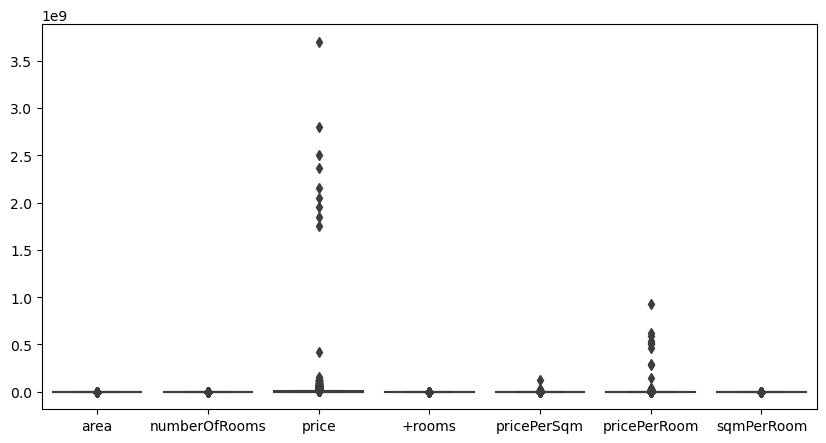

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(df_clean)

- Wie kann man Ausreißer behandeln?

C:\Users\msi\AppData\Local\Temp\ipykernel_22784\3278933351.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["price"][outliers] = df_clean["price"][~outliers].mean()
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: 

<Axes: >

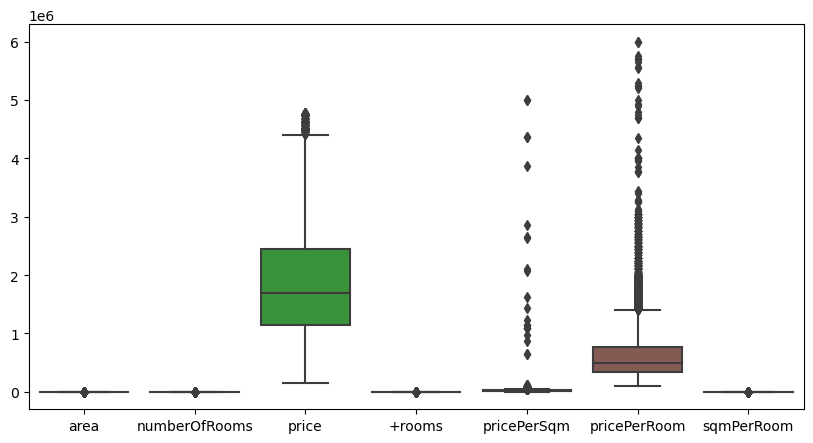

In [50]:
import numpy as np

quartile_1 = df_clean["price"].quantile(0.25)
quartile_3 = df_clean["price"].quantile(0.75)
inter_quartile_range = quartile_3 - quartile_1
threshold = 1.5
outliers = ((df_clean["price"] < (quartile_1 - inter_quartile_range * threshold))
            | (df_clean["price"] > (quartile_3 + inter_quartile_range * threshold)))

handle_by = 'average'
if handle_by == "dropping":
    df_clean = df_clean[~outliers]
elif handle_by == "average":
    df_clean["price"][outliers] = df_clean["price"][~outliers].mean()
elif handle_by == 'log_transform':
        df_clean['price'] = np.log(df_clean['price'])
        
plt.figure(figsize=(10, 5))
sns.boxplot(df_clean)

- Skalierungsmethoden 

   1. MinMax Skalierung (Normalisierung)
      - Werte fallen in bestimmten Wertebereich, z.B.: [0;1]
      - Beziehung zwischen Datenpunkten bleibt erhalten.
      - Eingesetzt für Algorithmen bei denen die Distanz von Datenpunkten wichtig ist, z.B.: k-Nearest Neighbors KNN
   2. Standardisierung
      - Daten werden geändert, um einen Mittelwert von 0 und Standardabweichung von 1 zu haben.
      - Eingesetzt für Methoden die von normalverteilten Daten ausgehen, z.B. Principal Component Analysis (PCA) und Support Vector Machines (SVMs).
   3. Robuste Skalierung
      - Reduziert den Einfluss von Ausreißern.
      - Verwendet den Mittelwert und die Interquartildistanz. 
   4. Logarithmus
      - Anwenden des Logarithmus auf Daten.
      - Eingesetzt um die Auswirkungen von rechtsschiefen Daten zu verringern und die Verteilung symmetrischer zu machen, z.B. bei Werten die sich über mehrere Größenordnungen erstrecken.
   5. Box-Cox Transformation
      - Ändert die Verteilung von Daten, um diese so normalverteilt wie möglich zu machen.

C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\msi\anaconda3\anaconda3_main\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: >

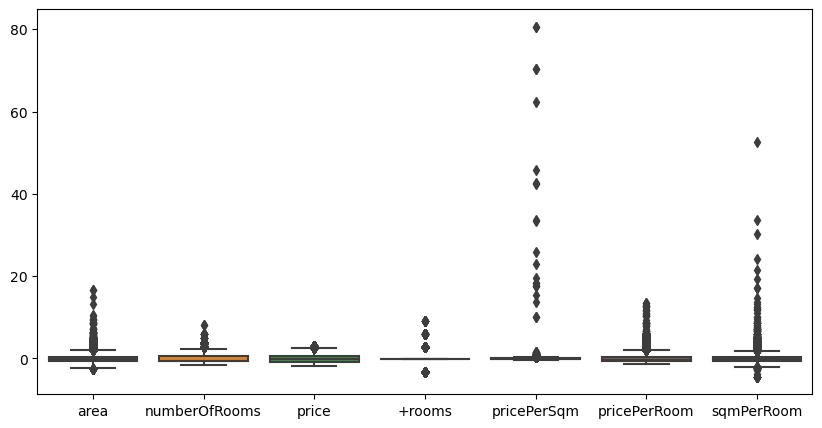

In [54]:
from sklearn.preprocessing import StandardScaler

df_numeric = df_clean.select_dtypes(include=['number'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

plt.figure(figsize=(10, 5))
sns.boxplot(df_scaled)

- Wie stellt man Korrelationen zwischen Daten dar?

<Axes: >

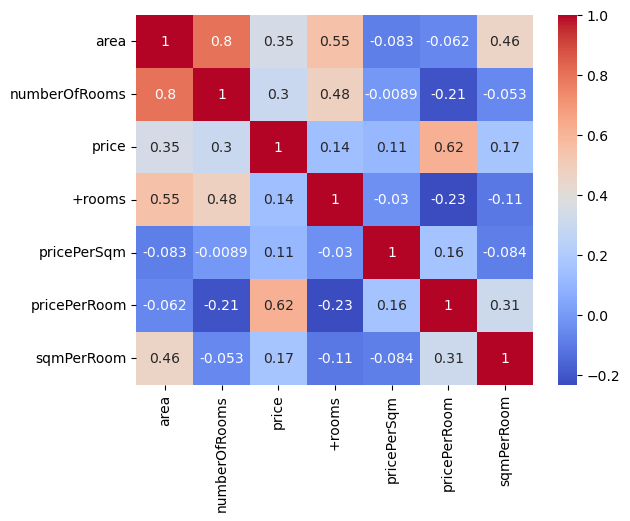

In [59]:
sns.heatmap(df_scaled.corr(), cmap='coolwarm', annot=True)